###baseline

In [21]:
## импорты
import json 
import matplotlib.pyplot as plt
import numpy as np

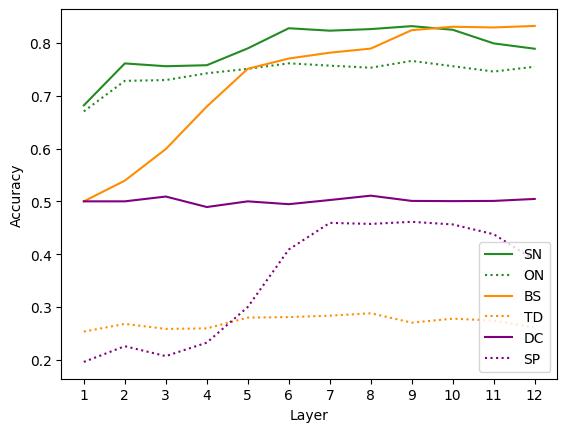

In [22]:
# для слоев 
tasks = ['SN', 'ON', 'BS', 'TD','DC', 'SP']
styles = ['solid', 'dotted', 'solid', 'dotted', 'solid', 'dotted']
colors = ['forestgreen', 'forestgreen', 'darkorange', 'darkorange', 'purple', 'purple']
i = 0
for task in tasks:
    with open(f'/content/drive/MyDrive/probing/bert based/logs/log_{task}.txt') as f:
        log = json.load(f) 
    task_acc = log['results']['test_score']['accuracy']
    plt.plot([int(i) + 1 for i in list(task_acc.keys())], list(task_acc.values()), color = colors[i], linestyle = styles[i], label = task)
    i += 1
plt.xticks(np.arange(1, 13, step=1))
plt.xlabel('Layer') 
plt.ylabel('Accuracy') 
plt.legend(loc='lower right')

###main

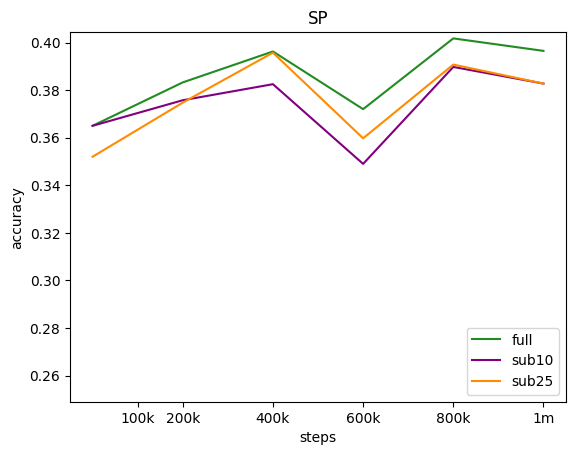

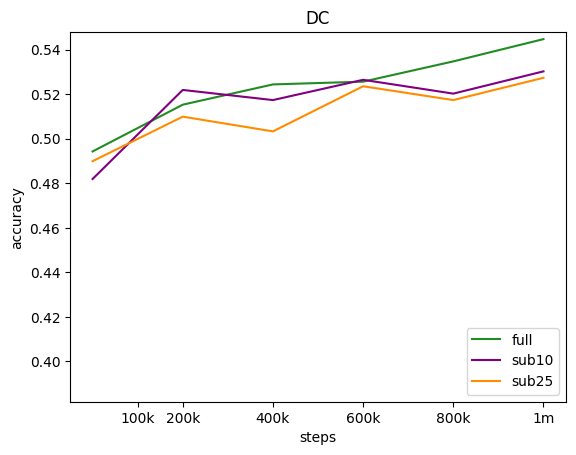

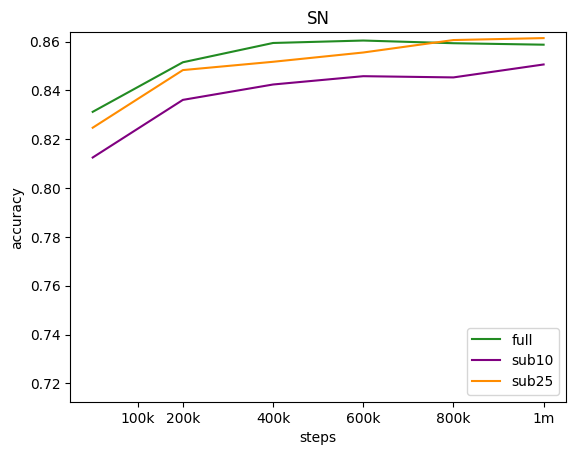

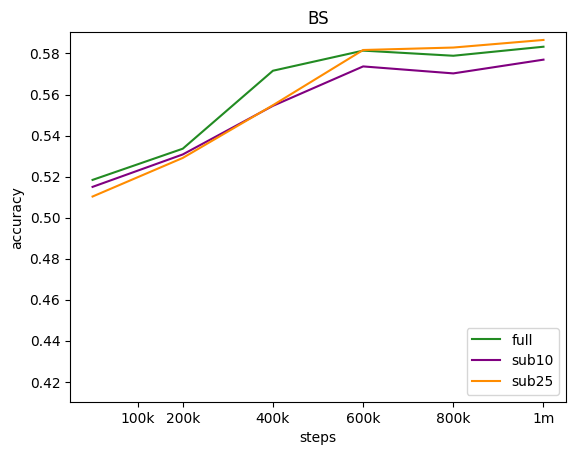

In [27]:
#/content/drive/MyDrive/probing/reses/res_sp_1.txt
tasks = ['sp', 'dc', 'sn', 'bs', 'td']
checks = ['1', '2', '4', '6', '8', '10']
ch_int = [int(i) for i in checks]
for task in tasks[:4]:
  full = []
  p10 = []
  p25 = []
  files = []
  for ch in checks:
    files.append(f'/content/drive/MyDrive/probing/reses/res_{task}_{ch}.txt')
  for fi in files:
    with open(fi) as f:
      lines = f.readlines()
      full_item = lines[0].split('\t')[1]
      full_item = full_item.replace("'", '"')
      fuit = json.loads(full_item)
      full.append(fuit['__OVERALL__'])

      p10_item = lines[1].split('\t')[1]
      p10_item = p10_item.replace("'", '"')
      pp10 = json.loads(p10_item)
      p10.append(pp10['__OVERALL__'])

      p25_item = lines[2].split('\t')[1]
      p25_item = p25_item.replace("'", '"')
      pp25 = json.loads(p25_item)
      p25.append(pp25['__OVERALL__'])



  plt.figure()
  plt.plot(full, color = 'forestgreen', label = 'full')
  plt.plot(p10, color = 'purple', label = 'sub10')
  plt.plot(p25, color = 'darkorange', label = 'sub25')
  plt.xticks(ticks = [0.5, 1, 2, 3, 4, 5], labels = ['100k', '200k', '400k', '600k', '800k', '1m'])
  plt.yticks(np.arange(0.2, max(full), step=0.02))
  plt.legend(loc='lower right')
  plt.title(task.upper())
  plt.xlabel('steps')
  plt.ylabel('accuracy')
  #plt.xlim(xmin=0)
  plt.ylim(ymin = min(min(p10), min(p25))-0.1)
  plt.show()

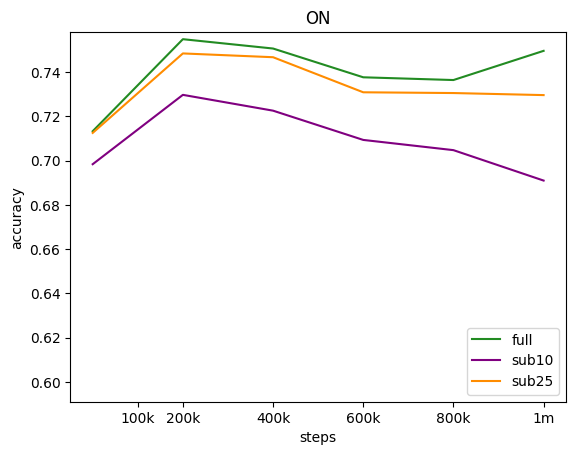

In [25]:
#ON
full = []
p10 = []
p25 = []
fs = []
for ch in checks:
  fs.append(f'/content/drive/MyDrive/probing/reses/res_on_{ch}.txt')

for fi in fs:
  with open(fi) as f:
    lines = f.readlines()
    full_item = lines[0].split('    ')[1]
    full_item = full_item.replace("'", '"')
    fuit = json.loads(full_item)
    full.append(fuit['__OVERALL__'])

    p10_item = lines[1].split('    ')[1]
    p10_item = p10_item.replace("'", '"')
    pp10 = json.loads(p10_item)
    p10.append(pp10['__OVERALL__'])

    p25_item = lines[2].split('    ')[1]
    p25_item = p25_item.replace("'", '"')
    pp25 = json.loads(p25_item)
    p25.append(pp25['__OVERALL__'])


plt.figure()
plt.plot(full, color = 'forestgreen', label = 'full')
plt.plot(p10, color = 'purple', label = 'sub10')
plt.plot(p25, color = 'darkorange', label = 'sub25')
plt.xticks(ticks = [0.5, 1, 2, 3, 4, 5], labels = ['100k', '200k', '400k', '600k', '800k', '1m'])
plt.yticks(np.arange(0.2, max(full), step=0.02))
plt.legend(loc='lower right')
plt.title('ON')
plt.xlabel('steps')
plt.ylabel('accuracy')
#plt.xlim(xmin=0)
plt.ylim(ymin = min(min(p10), min(p25))-0.1)
plt.show()